In [1]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')

# adjust display settings
%matplotlib inline
plt.rc('figure', figsize=(18, 3))
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_rows = 20

##### Se lee el dataset y se se coloca el índice en formato temporal

In [2]:
df = pd.read_csv("AirPassengers.csv")

#Parse strings to datetime type
df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True) #convert from string to datetime
df_ind = df.set_index(['Month'])
df_ind.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


##### Cree una serie de pandas para representar la serie temporal

In [3]:
# COLOQUE EL CODIGO AQUI
s = pd.Series(df_ind.unstack().values, index=df_ind.index)

##### Compruebe si la serie es estacional. Justifique.

#### Visualización

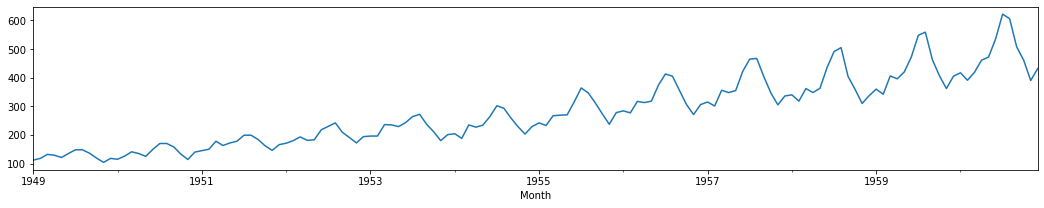

In [4]:
# COLOQUE EL CODIGO AQUI
s.plot();

#### Augmented-Dickey-Fuller-test

In [5]:
# calculate stationarity test of time series data
X = s.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Concluya.

Observando nuestro plot, y evaluando de manera gráfica, podemos ver claramente que hay un componente de seasonality muy marcado, y también hay una tendencia de incremento. Por tanto, se concluye que la serie no es estacional.

Además, observe que a través del Augmented-Dickey-Fuller-test obtenemos un estadístico que es positivo y mayor a los valores críticos porcentuales presentados, por lo tanto no podemos rechazar la hipótesis nula, sugiriendo que la serie no es estacional. Esto se confirma al observar nuestro p value, que en este caso corresponde a un p>0.05, lo cual nos indica que fallamos al rechazar la hipótesis nula, por tanto los datos tienen una "raiz unidad" (unit root) y es no estacional.

#### Divida la serie temporal en un conjunto de training (66%) y un conjunto de test.

In [6]:
# COLOQUE EL CODIGO AQUI
X = s.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]

##### Grafique la serie del training y la serie del test, en una misma gráfica (en diferentes colores)

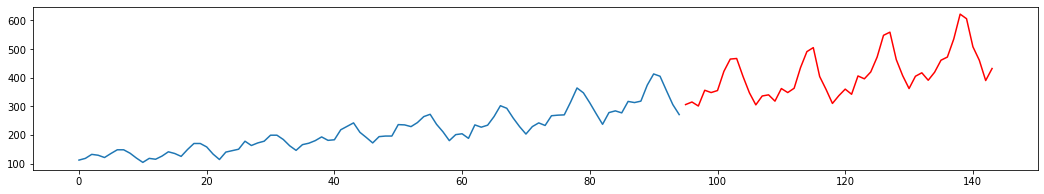

In [7]:
# COLOQUE EL CODIGO AQUI
plt.plot(train)
plt.plot([None for i in train] + [x for x in test], color='r');

##### Realice un pronóstico  continuo del modelo ARIMA, agregando una nueva observación (del test ) en cada iteración. 
Utilice `p=2`, `d=1`, `q=1`

In [8]:
model = ARIMA(s, order=(2,1,1))
model_fit = model.fit(disp=0)

##### Evalue el RMSE de las predicciones anteriores respecto a los valores originales del test set.

In [9]:
# COLOQUE EL CODIGO AQUI
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

    predic = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predic.append(yhat)
        history.append(test[t])
    rmse = np.sqrt(mean_squared_error(test, predic))
    return rmse

In [10]:
p = 2
d = 1
q = 1
order = (p, d, q)
evaluate_arima_model(s.values, order)

39.140050807805274

##### Grafique los valores originales y las predicciones de la serie temporal del test set

In [11]:
# COLOQUE EL CODIGO AQUI
X = s.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predic = []

In [12]:
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predic.append(yhat)
    obs = test[t]
    history.append(obs)

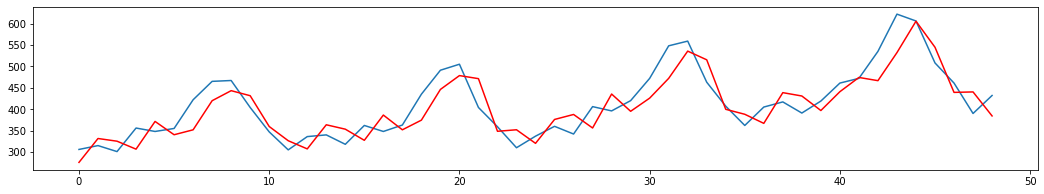

In [13]:
# plot forecasts against actual outcomes
plt.rc('figure', figsize=(18, 3))
plt.plot(test)
plt.plot(predic, color='red');